Draw 2D heatmaps as density isolines.

This notebook does not actually use `histoquant` and relies only on [brainglobe-heatmap](https://brainglobe.info/documentation/brainglobe-heatmap/index.html) to extract brain structures outlines.

Only the detections measurements with atlas coordinates exported from QuPath are used.

You need to select the range of data to be used, the regions outlines will be extracted at the centroid of that range. Therefore, a range that is too large will be misleading and irrelevant.

In [10]:
import brainglobe_heatmap as bgh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# path to the exported measurements from QuPath
filename = "../../resources/cells_measurements_detections.tsv"

Settings

In [12]:
# atlas to use
atlas_name = "allen_mouse_10um"
# brain regions whose outlines will be plotted
regions = ["root", "CB", "MY", "GRN", "IRN"]
# range to include, in Allen coordinates, in microns
ap_lims = [9800, 10000]  # lims : [0, 13200] for coronal
ml_lims = [5600, 5800]  # lims : [0, 11400] for sagittal
dv_lims = [3900, 4100]  # lims : [0, 8000] for top
# number of isolines
nlevels = 5
# color mapping between classification and matplotlib color
palette = {"Cells: marker-": "#d8782f", "Cells: marker+": "#8ccb73"}

In [13]:
df = pd.read_csv(filename, sep="\t")
display(df.head())

,Image,Object ID,Object type,Name,Classification,Parent,ROI,Atlas_X,Atlas_Y,Atlas_Z
0,animalid0_030.ome.tiff,5ff386a8-5abd-46d1-8e0d-f5c5365457c1,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5230,4.2724,4.2767
1,animalid0_030.ome.tiff,9a2a9a8c-acbe-4308-bc5e-f3c9fd1754c0,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5202,4.2784,4.4186
2,animalid0_030.ome.tiff,481a519b-8b40-4450-9ec6-725181807d72,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5060,4.3172,4.3563
3,animalid0_030.ome.tiff,fd28e09c-2c64-4750-b026-cd99e3526a57,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5284,4.2574,4.3364
4,animalid0_030.ome.tiff,3d9ce034-f2ed-4c73-99be-f782363cf323,Detection,NaN,Cells: marker-,VeCB,Polygon,11.5487,4.2033,4.2943


Here we can filter out classifications we don't wan't to display.

In [14]:
# select objects
# df = df[df["Classification"] == "example: classification"]

In [15]:
# get outline coordinates in coronal (=frontal) orientation
coords_coronal = bgh.get_structures_slice_coords(
    regions,
    orientation="frontal",
    atlas_name=atlas_name,
    position=(np.mean(ap_lims), 0, 0),
)
# get outline coordinates in sagittal orientation
coords_sagittal = bgh.get_structures_slice_coords(
    regions,
    orientation="sagittal",
    atlas_name=atlas_name,
    position=(0, 0, np.mean(ml_lims)),
)
# get outline coordinates in top (=horizontal) orientation
coords_top = bgh.get_structures_slice_coords(
    regions,
    orientation="horizontal",
    atlas_name=atlas_name,
    position=(0, np.mean(dv_lims), 0),
)

Text(2, 7.9, '1 mm')

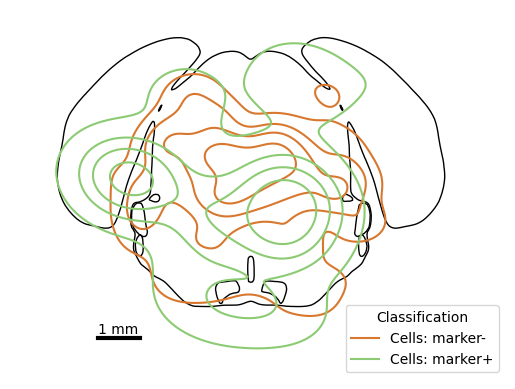

In [16]:
# Coronal projection
# select objects within the rostro-caudal range
df_coronal = df[
    (df["Atlas_X"] >= ap_lims[0] / 1000) & (df["Atlas_X"] <= ap_lims[1] / 1000)
]

plt.figure()

for struct_name, contours in coords_coronal.items():
    for cont in contours:
        plt.fill(cont[:, 0] / 1000, cont[:, 1] / 1000, lw=1, fc="none", ec="k")

# see https://seaborn.pydata.org/generated/seaborn.kdeplot.html to customize
ax = sns.kdeplot(
    df_coronal,
    x="Atlas_Z",
    y="Atlas_Y",
    hue="Classification",
    levels=nlevels,
    common_norm=False,
    palette=palette,
)
ax.invert_yaxis()
sns.despine(left=True, bottom=True)
plt.axis("equal")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.plot([2, 3], [8, 8], "k", linewidth=3)
plt.text(2, 7.9, "1 mm")

Text(2, 7, '1 mm')

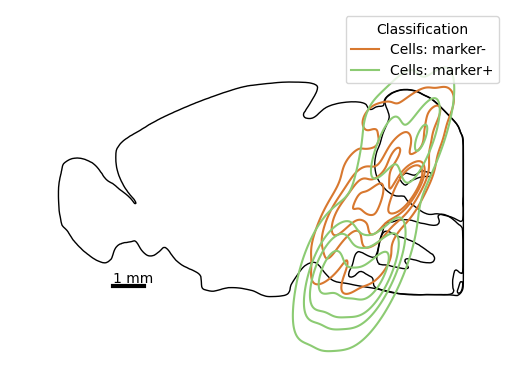

In [17]:
# Sagittal projection
# select objects within the medio-lateral range
df_sagittal = df[
    (df["Atlas_Z"] >= ml_lims[0] / 1000) & (df["Atlas_Z"] <= ml_lims[1] / 1000)
]

plt.figure()

for struct_name, contours in coords_sagittal.items():
    for cont in contours:
        plt.fill(cont[:, 0] / 1000, cont[:, 1] / 1000, lw=1, fc="none", ec="k")

# see https://seaborn.pydata.org/generated/seaborn.kdeplot.html to customize
ax = sns.kdeplot(
    df_sagittal,
    x="Atlas_X",
    y="Atlas_Y",
    hue="Classification",
    levels=nlevels,
    common_norm=False,
    palette=palette,
)
ax.invert_yaxis()
sns.despine(left=True, bottom=True)
plt.axis("equal")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.plot([2, 3], [7.1, 7.1], "k", linewidth=3)
plt.text(2, 7, "1 mm")

Text(0.5, 0.4, '1 mm')

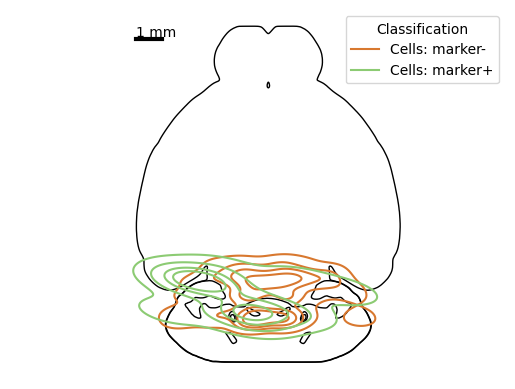

In [18]:
# Top projection
# select objects within the dorso-ventral range
df_top = df[(df["Atlas_Y"] >= dv_lims[0] / 1000) & (df["Atlas_Y"] <= dv_lims[1] / 1000)]

plt.figure()

for struct_name, contours in coords_top.items():
    for cont in contours:
        plt.fill(-cont[:, 0] / 1000, cont[:, 1] / 1000, lw=1, fc="none", ec="k")

# see https://seaborn.pydata.org/generated/seaborn.kdeplot.html to customize
ax = sns.kdeplot(
    df_top,
    x="Atlas_Z",
    y="Atlas_X",
    hue="Classification",
    levels=nlevels,
    common_norm=False,
    palette=palette,
)
ax.invert_yaxis()
sns.despine(left=True, bottom=True)
plt.axis("equal")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.plot([0.5, 1.5], [0.5, 0.5], "k", linewidth=3)
plt.text(0.5, 0.4, "1 mm")